In [6]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

<font size=5>1. Classification</font>

In [13]:
# Load the Paribas dataset
data=pd.read_csv('datasets/paribas.csv',nrows=50000)
data.shape

(50000, 133)

In [18]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [16]:
# In practice, feature selection should be done after data pre-processing,
# Ideally, all categorical variables are encoded into numerical values,
# and then you can assess how deterministic they are of the target.

# here for simplicity We will use only numerical Variables
# Select numerical columns
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numerics).columns)
data=data[numerical_vars]
data.shape

(50000, 114)

In [17]:
# Split the train and test sets to avoid overfitting
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                              data['target'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((35000, 112), (15000, 112))

In [11]:
# Calculate the mutual information between the variables and the target
# this returns the mutual information value of each features
# the smaller the value the less information the feature has about the target.
mi=mutual_info_classif(x_train.fillna(0),y_train)
mi

array([0.00000000e+00, 3.56390063e-03, 5.36747265e-03, 2.50969774e-03,
       1.83444031e-03, 9.21638352e-03, 4.99432612e-03, 4.05167666e-03,
       2.52737202e-02, 3.54388301e-03, 1.72732749e-02, 6.24649852e-03,
       2.30210827e-02, 4.91292734e-03, 4.13115764e-03, 3.03073695e-03,
       2.23232596e-03, 5.76567866e-03, 5.71206057e-04, 1.18133000e-02,
       0.00000000e+00, 4.01617153e-03, 4.24640172e-03, 3.61458042e-03,
       6.84726503e-03, 3.10329402e-03, 1.93849973e-03, 8.25579755e-03,
       8.50878808e-03, 6.18572893e-03, 4.78825994e-03, 4.42951232e-03,
       2.12651035e-03, 5.56917711e-03, 7.13739127e-03, 4.92764959e-03,
       7.27018803e-03, 1.08602114e-03, 3.32768586e-03, 5.74045009e-03,
       5.79761040e-03, 2.87520561e-03, 6.23914980e-03, 3.90963870e-02,
       6.45634494e-03, 5.06546566e-03, 5.02700984e-03, 2.51317685e-03,
       8.61024414e-03, 2.70650897e-03, 4.98952701e-03, 3.23527408e-03,
       3.61300237e-03, 1.40352222e-02, 5.47955292e-03, 5.81165624e-03,
      

In [19]:
mi=pd.Series(mi)
mi.index=x_train.columns
mi.sort_values(ascending=False)

v50     0.039096
v10     0.025274
v14     0.023021
v12     0.017273
v62     0.014035
v129    0.014033
v21     0.011813
v93     0.010498
v114    0.009927
v7      0.009216
v57     0.008610
v34     0.008509
v101    0.008389
v85     0.008285
v33     0.008256
v82     0.008218
v99     0.007721
v123    0.007440
v120    0.007389
v42     0.007270
v40     0.007137
v100    0.007051
v28     0.006847
v130    0.006660
v126    0.006586
v51     0.006456
v106    0.006412
v13     0.006246
v49     0.006239
v35     0.006186
          ...   
v17     0.003031
v86     0.003000
v48     0.002875
v116    0.002836
v87     0.002759
v58     0.002707
v55     0.002513
v5      0.002510
v18     0.002232
v38     0.002127
v102    0.001958
v32     0.001938
v6      0.001834
v96     0.001811
v104    0.001791
v70     0.001549
v67     0.001460
v84     0.001159
v78     0.001115
v43     0.001086
v20     0.000571
v97     0.000417
v68     0.000061
v81     0.000024
v124    0.000000
v92     0.000000
v115    0.000000
v95     0.0000

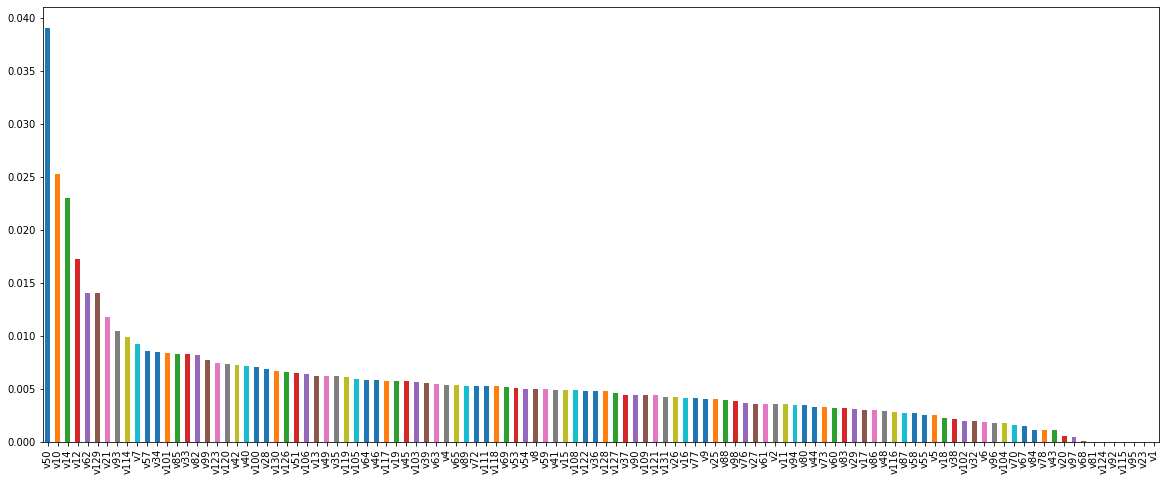

In [20]:
# Plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

Comparatively, we can see that there are a few features(left to the plot) that seem to contribute the most to predicting the target. There are also few features with almost 0 MI value on the right of the plot.

One could choose a certain value of MI after studying the plot above. An alternative and the most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the top 10th percentile of the MI Value distribution.

To do this, we can use MI in combination with `SelectKBest` or `SelectPercentile`.

In [21]:
# Here we'll select top 10 features which are shown below
sel=SelectKBest(mutual_info_classif,k=10).fit(x_train.fillna(0),y_train)
x_train.columns[sel.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v50', 'v62', 'v72', 'v82', 'v114', 'v129'], dtype='object')

 <font size=5>2. Regression</font>

In [22]:
# Load the House Price dataset for Feature Extraction
data=pd.read_csv('datasets/houseprice.csv')
data.shape

(1460, 81)

In [24]:
# In practice, feature selection should be done after data pre-processing,
# Ideally, all categorical variables are encoded into numerical values,
# and then you can assess how deterministic they are of the target.

# here for simplicity We will use only numerical Variables
# Select numerical columns
numerical_vars=list(data.select_dtypes(include=numerics).columns)
data=data[numerical_vars]
data.shape

(1460, 38)

In [25]:
# Seperate train and test sets
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['SalePrice'],axis=1),
                                              data['SalePrice'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((1022, 37), (438, 37))

/Users/shri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


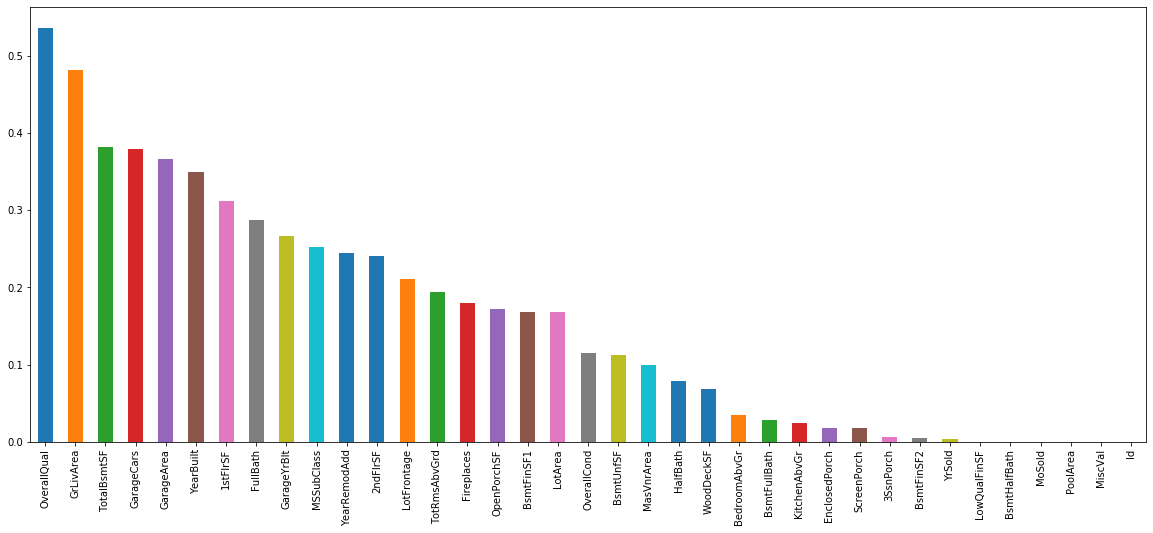

In [26]:
# Determine the Mutual Information
mi=mutual_info_regression(x_train.fillna(0),y_train)
mi=pd.Series(mi)
mi.index=x_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

Same Conclusion can be made as above.

In [29]:
# Here we'll select top 10 percentile of the features i.e if there are 100 feature 
# then 10 features will be selected
sel=SelectPercentile(mutual_info_regression,percentile=10).fit(x_train.fillna(10),y_train)
x_train.columns[sel.get_support()]

/Users/shri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')